In [87]:
# dataset
# https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download

In [88]:
!git clone https://github.com/stvschmdt/ne_ds5230.git

fatal: destination path 'ne_ds5230' already exists and is not an empty directory.


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [90]:
data = pd.read_csv('ne_ds5230/cbb.csv')
data.rename(mapper={"TEAM": "Team", "CONF": "Conference", "G": "Number of Games", "W": "Number of Wins", "ADJOE": "Adjusted Offensive Efficiency", "ADJDE": "Adjusted Defensive Efficiency", "TOR": "Turnover Rate", "TORD": "Steal Rate",
                    "EFG_O": "Percent Effective Field Goals Shot", "EFG_D": "Percent Effective Field Goals Allowed", "ORB": "Offensive Rebound Rate", "DRB": "Offensive Rebound Rate Allowed", "FTR": "Free Throw Rate",
                    "FTRD": "Free Throw Rate Allowed", "2P_O": "Two Point Shooting Percentage", "2P_D": "Two Point Shooting Percentage Allowed", "3P_O": "Three Point Shooting Percentage", "3P_D": "Three Point Shooting Percentage Allowed",
                    "ADJ_T": "Adjusted Tempo", "WAB": "Wins Above Bubble", "POSTSEASON": "Postseason", "SEED": "Seed", "YEAR": "Year"}, inplace=True, axis=1)

In [91]:
data.columns

Index(['Team', 'Conference', 'Number of Games', 'Number of Wins',
       'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
       'BARTHAG', 'Percent Effective Field Goals Shot',
       'Percent Effective Field Goals Allowed', 'Turnover Rate', 'Steal Rate',
       'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
       'Free Throw Rate', 'Free Throw Rate Allowed',
       'Two Point Shooting Percentage',
       'Two Point Shooting Percentage Allowed',
       'Three Point Shooting Percentage',
       'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
       'Wins Above Bubble', 'Postseason', 'Seed', 'Year'],
      dtype='object')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Team                                     2455 non-null   object 
 1   Conference                               2455 non-null   object 
 2   Number of Games                          2455 non-null   int64  
 3   Number of Wins                           2455 non-null   int64  
 4   Adjusted Offensive Efficiency            2455 non-null   float64
 5   Adjusted Defensive Efficiency            2455 non-null   float64
 6   BARTHAG                                  2455 non-null   float64
 7   Percent Effective Field Goals Shot       2455 non-null   float64
 8   Percent Effective Field Goals Allowed    2455 non-null   float64
 9   Turnover Rate                            2455 non-null   float64
 10  Steal Rate                               2455 no

In [93]:
data.Postseason.unique()

array(['2ND', 'Champions', 'E8', 'F4', nan, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [94]:
data.describe()

,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,Offensive Rebound Rate,...,Free Throw Rate,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Seed,Year
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,...,2455.000000,2455.00000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,476.000000,2455.000000
mean,31.492464,16.284318,103.304481,103.304603,0.493957,49.805132,50.001385,18.763055,18.689572,29.875642,...,35.989776,36.26998,48.802281,48.976660,34.406395,34.598737,67.812301,-7.802485,8.802521,2016.007332
std,2.657401,6.610960,7.376981,6.605318,0.256244,3.143061,2.939602,2.090595,2.201749,4.134332,...,5.247820,6.24590,3.384468,3.340546,2.789434,2.415766,3.277622,6.965736,4.676354,1.999375
min,15.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,15.000000,...,21.600000,21.80000,37.700000,37.700000,24.900000,27.100000,57.200000,-25.200000,1.000000,2013.000000
25%,30.000000,11.000000,98.300000,98.500000,0.282200,47.750000,48.000000,17.300000,17.200000,27.100000,...,32.400000,31.90000,46.500000,46.700000,32.500000,33.000000,65.700000,-13.000000,5.000000,2014.000000
50%,31.000000,16.000000,103.000000,103.500000,0.475000,49.700000,50.000000,18.700000,18.600000,29.900000,...,35.800000,35.80000,48.700000,49.000000,34.400000,34.600000,67.800000,-8.300000,9.000000,2016.000000
75%,33.000000,21.000000,108.000000,107.900000,0.712200,51.900000,52.000000,20.100000,20.100000,32.600000,...,39.500000,40.20000,51.000000,51.300000,36.300000,36.200000,70.000000,-3.150000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,27.100000,28.500000,43.600000,...,58.600000,60.70000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [95]:
data.groupby('Team').count()

,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
Team,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,1,1,6
Air Force,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
Akron,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama A&M,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wright St.,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Wyoming,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Xavier,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,5,5,7


In [96]:
data.head()

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [97]:
averages = data[['Conference', 'Number of Games', 'Number of Wins', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'BARTHAG', 'Percent Effective Field Goals Shot', 'Percent Effective Field Goals Allowed',
       'Turnover Rate', 'Steal Rate', 'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
       'Free Throw Rate', 'Free Throw Rate Allowed',
       'Two Point Shooting Percentage',
       'Two Point Shooting Percentage Allowed',
       'Three Point Shooting Percentage',
       'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
       'Wins Above Bubble']].groupby('Conference').mean()

array([[<Axes: title={'center': 'Number of Games'}>,
        <Axes: title={'center': 'Number of Wins'}>,
        <Axes: title={'center': 'Adjusted Offensive Efficiency'}>,
        <Axes: title={'center': 'Adjusted Defensive Efficiency'}>],
       [<Axes: title={'center': 'BARTHAG'}>,
        <Axes: title={'center': 'Percent Effective Field Goals Shot'}>,
        <Axes: title={'center': 'Percent Effective Field Goals Allowed'}>,
        <Axes: title={'center': 'Turnover Rate'}>],
       [<Axes: title={'center': 'Steal Rate'}>,
        <Axes: title={'center': 'Offensive Rebound Rate'}>,
        <Axes: title={'center': 'Offensive Rebound Rate Allowed'}>,
        <Axes: title={'center': 'Free Throw Rate'}>],
       [<Axes: title={'center': 'Free Throw Rate Allowed'}>,
        <Axes: title={'center': 'Two Point Shooting Percentage'}>,
        <Axes: title={'center': 'Two Point Shooting Percentage Allowed'}>,
        <Axes: title={'center': 'Three Point Shooting Percentage'}>],
       [<Axes

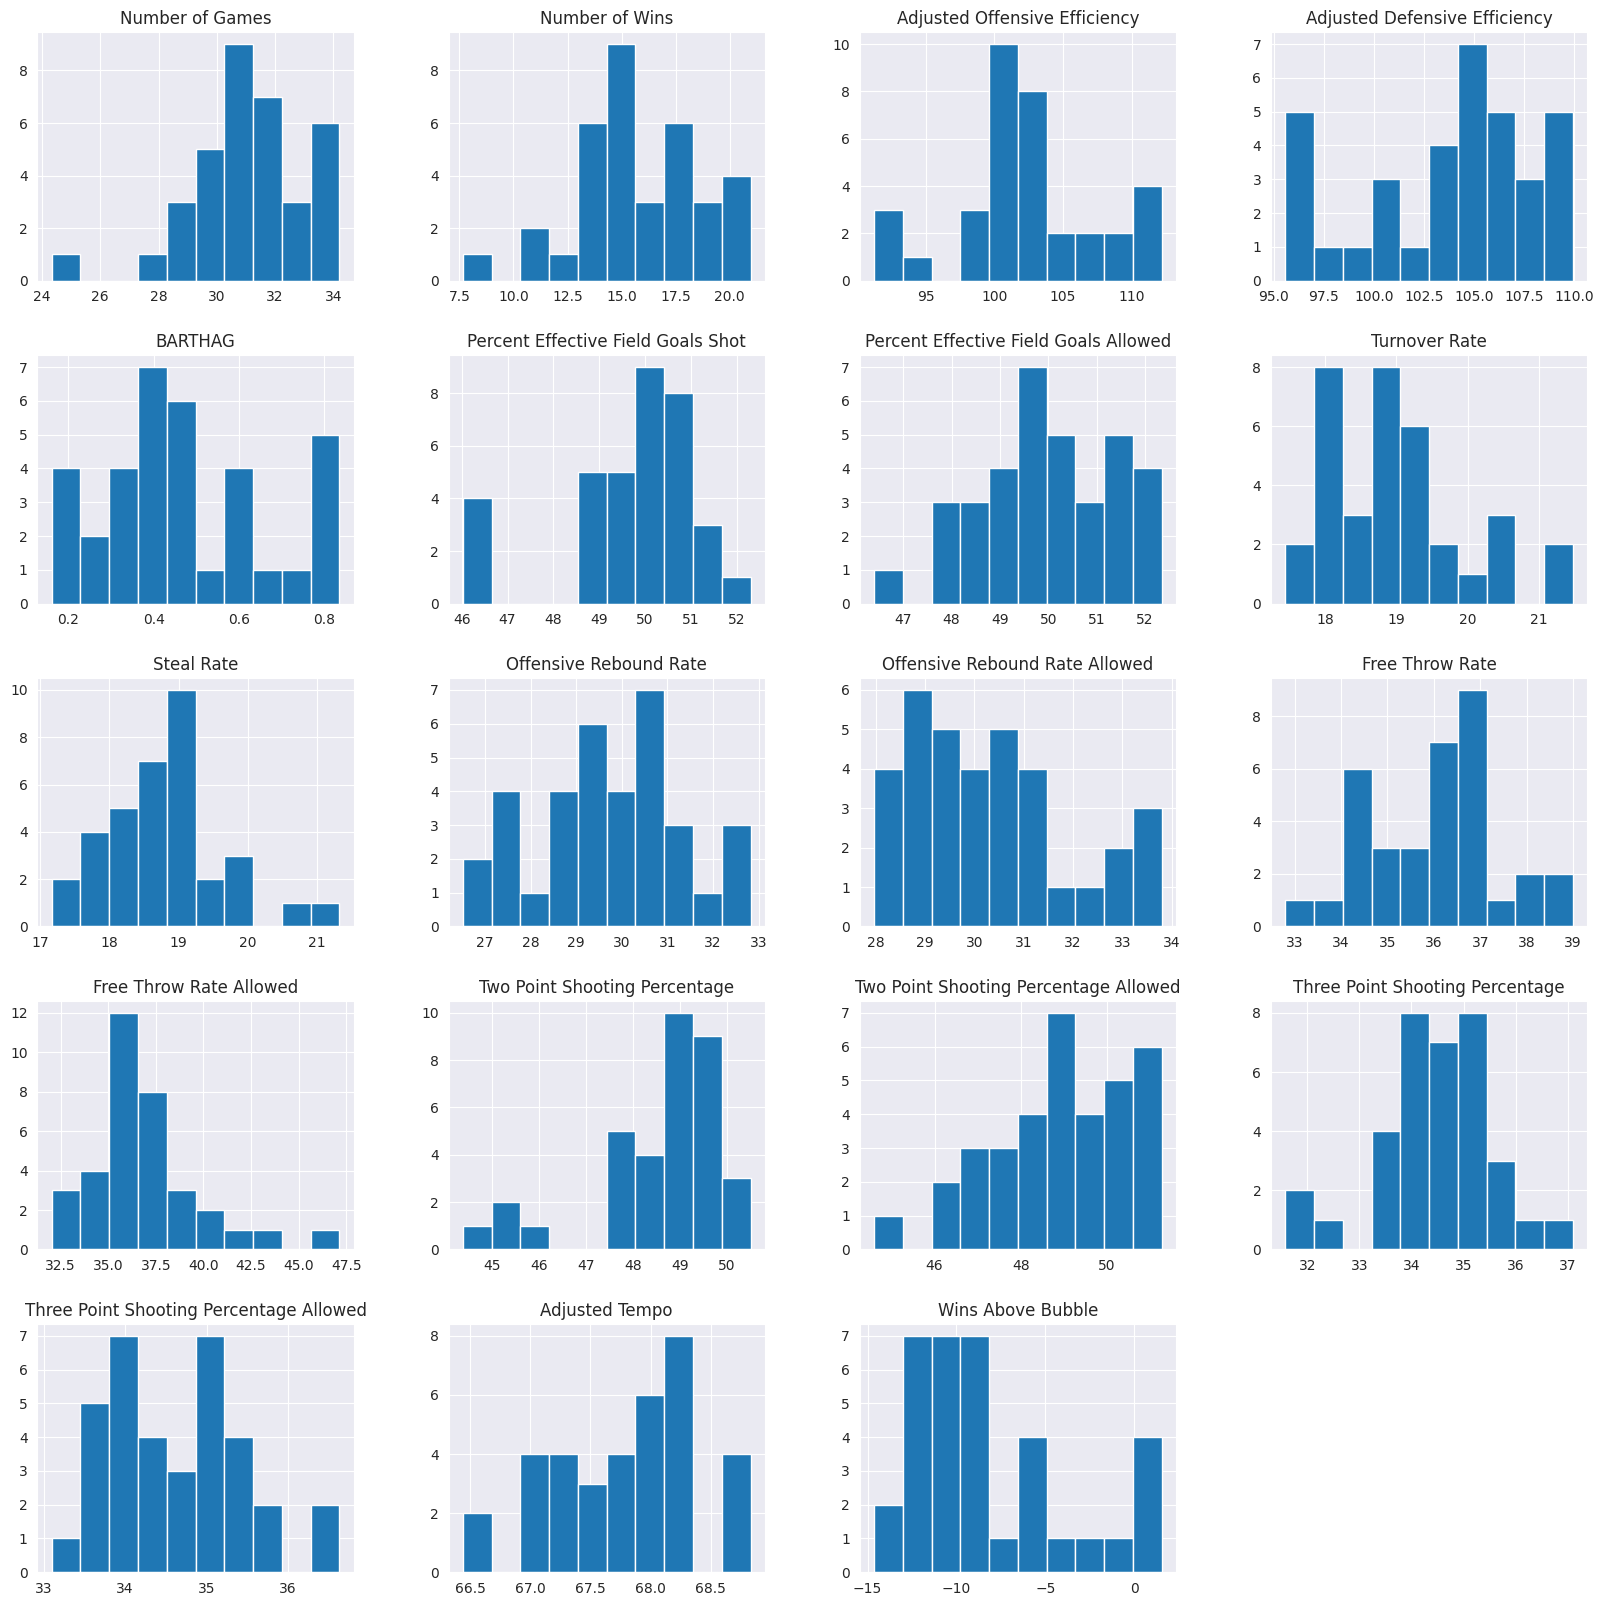

In [98]:
averages.hist(figsize=(20,20))

In [99]:
first_rounds = data[(data.Postseason =='R64') | (data.Postseason == 'R32')]

In [100]:
final_four = data[(data.Postseason =='2ND') | (data.Postseason == 'Champions') | (data.Postseason == 'F4') | (data.Postseason == 'E8') | (data.Postseason == 'S16')]

In [101]:
final_four

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


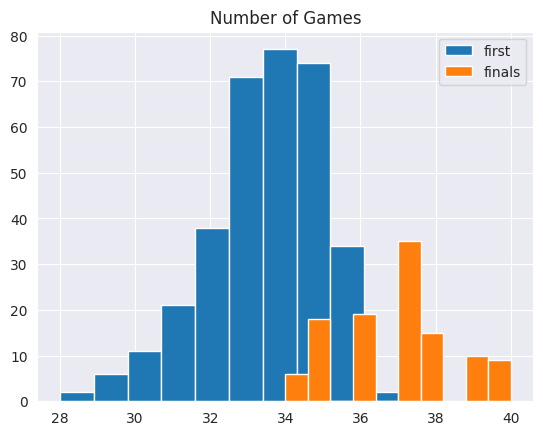

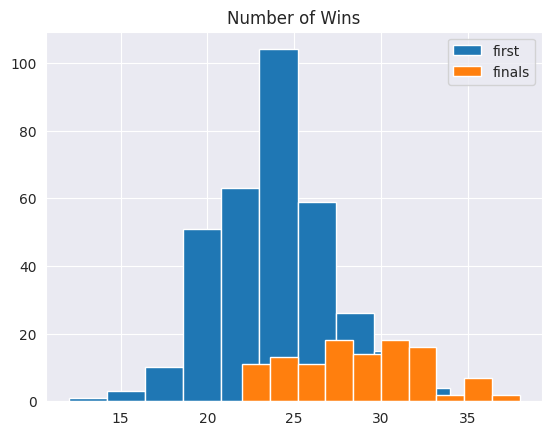

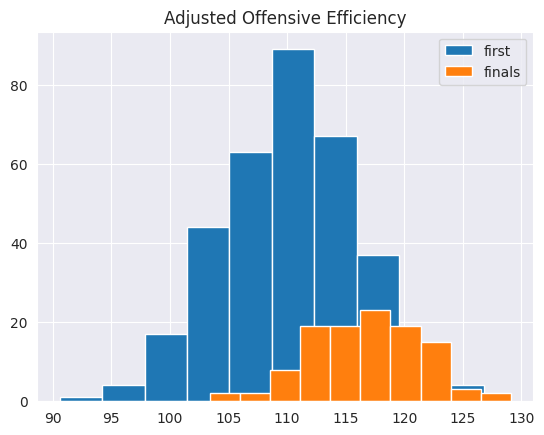

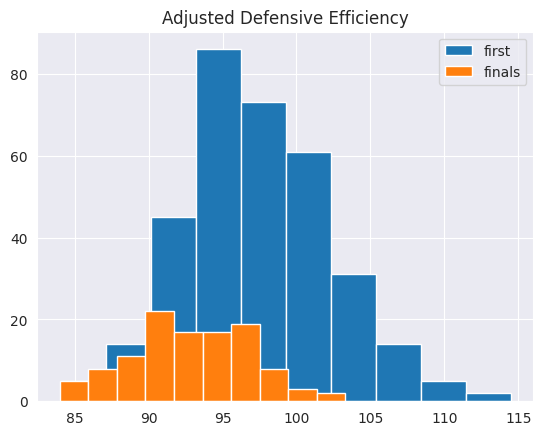

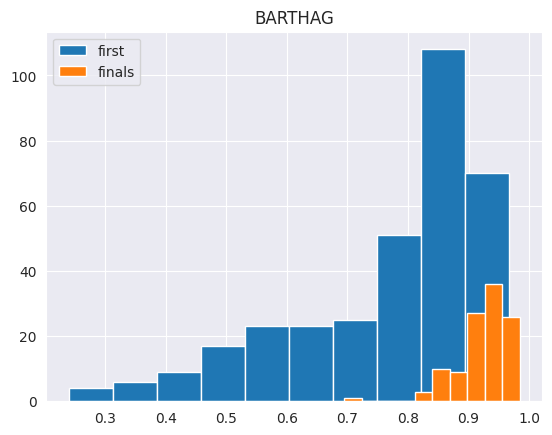

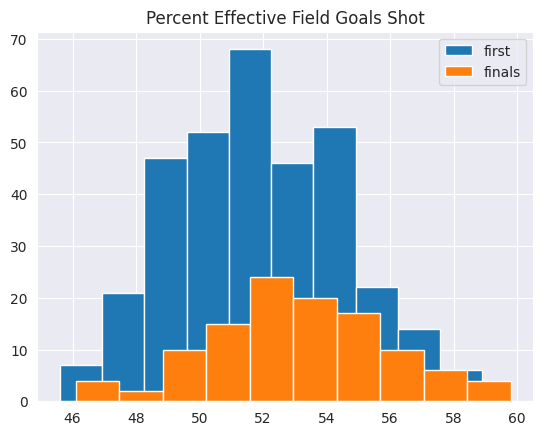

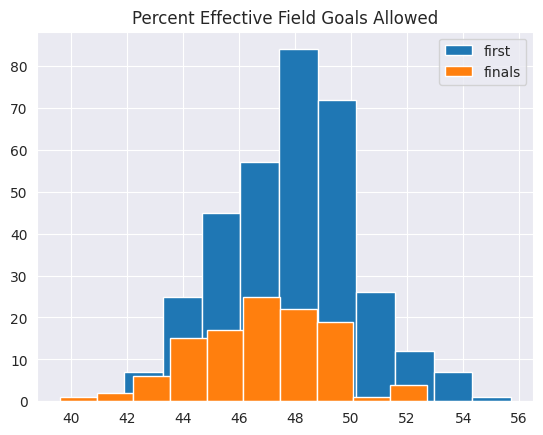

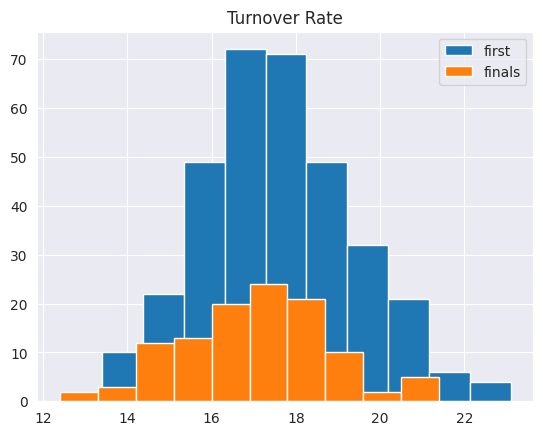

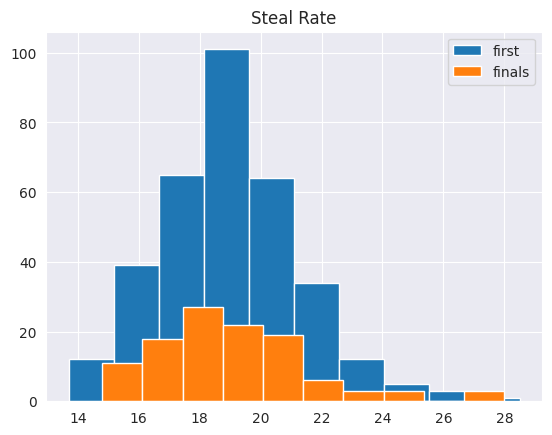

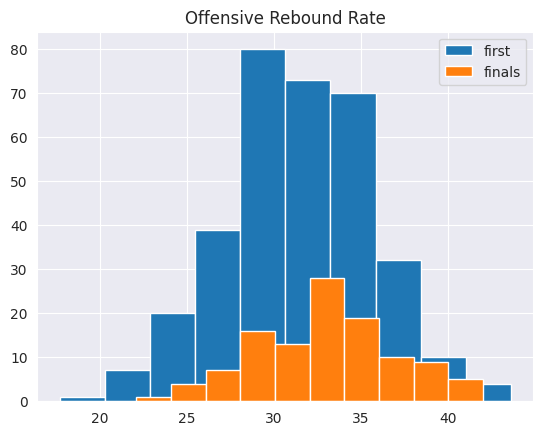

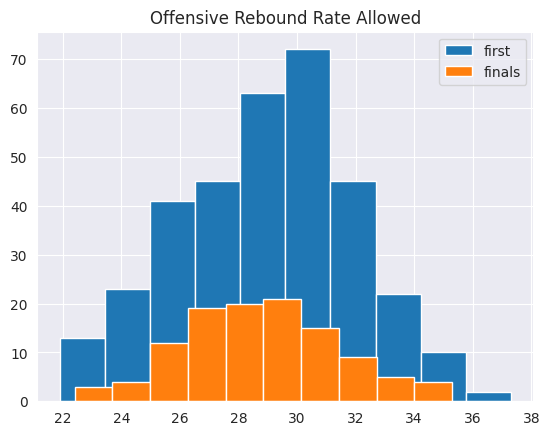

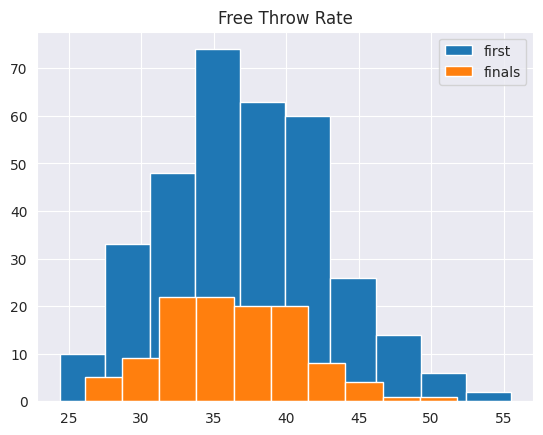

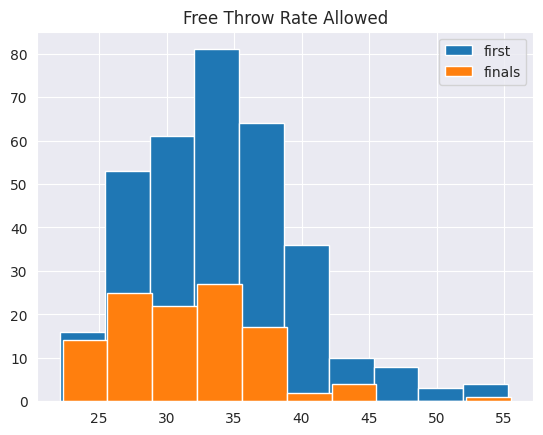

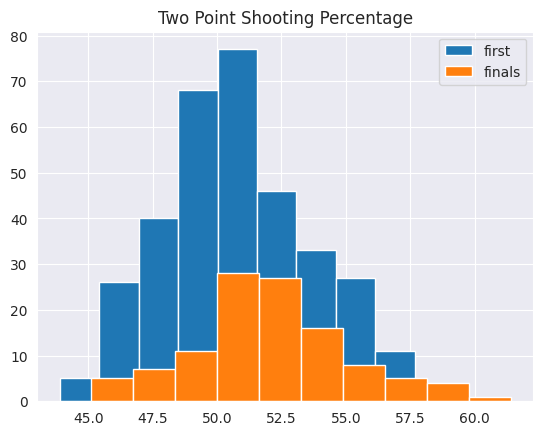

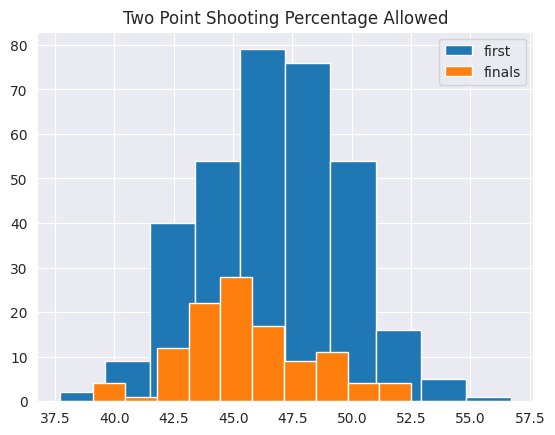

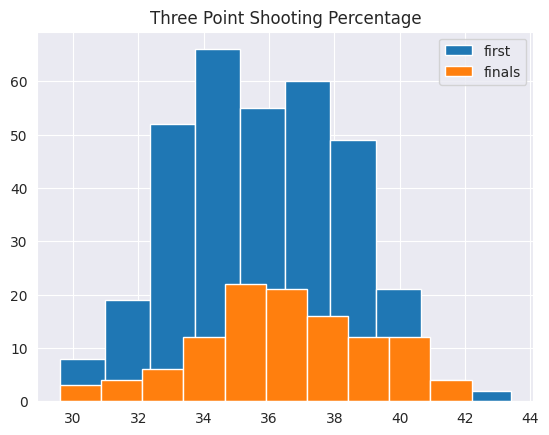

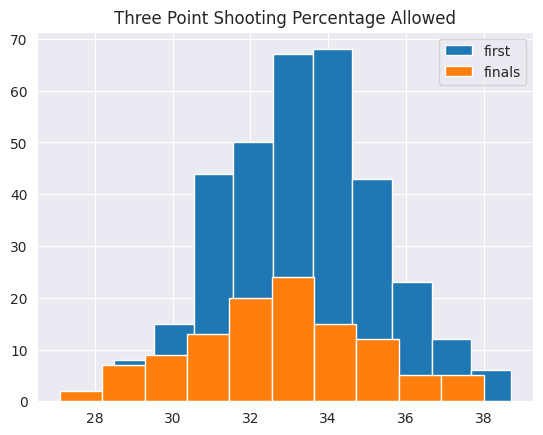

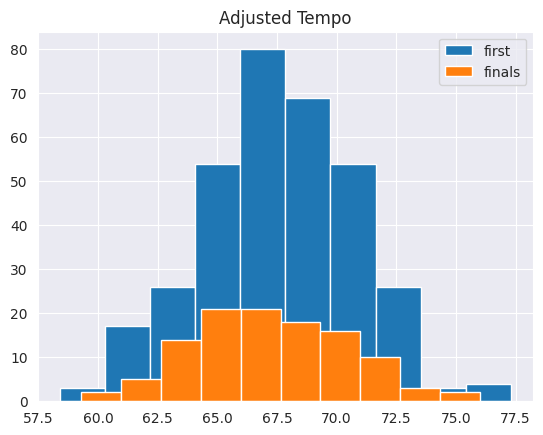

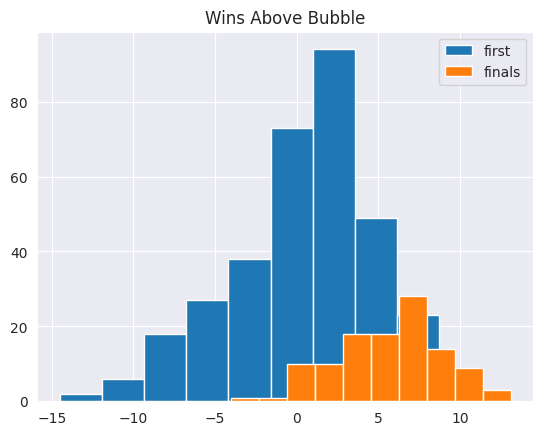

In [102]:
numerics = ['Number of Games', 'Number of Wins', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
            'BARTHAG', 'Percent Effective Field Goals Shot', 'Percent Effective Field Goals Allowed',
            'Turnover Rate', 'Steal Rate', 'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
            'Free Throw Rate', 'Free Throw Rate Allowed', 'Two Point Shooting Percentage',
            'Two Point Shooting Percentage Allowed', 'Three Point Shooting Percentage',
            'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
            'Wins Above Bubble']
for col in numerics:
    plt.hist(first_rounds[col], label='first')
    plt.hist(final_four[col], label='finals')
    plt.legend()
    plt.title('{}'.format(col))
    plt.show()

In [103]:
first_rounds[numerics].mean() - final_four[numerics].mean()

Number of Games                           -3.342262
Number of Wins                            -4.970238
Adjusted Offensive Efficiency             -6.720536
Adjusted Defensive Efficiency              4.436607
BARTHAG                                   -0.152217
Percent Effective Field Goals Shot        -1.293750
Percent Effective Field Goals Allowed      1.076786
Turnover Rate                              0.646726
Steal Rate                                -0.144048
Offensive Rebound Rate                    -1.658333
Offensive Rebound Rate Allowed             0.144048
Free Throw Rate                            0.826488
Free Throw Rate Allowed                    2.384226
Two Point Shooting Percentage             -1.368155
Two Point Shooting Percentage Allowed      1.165774
Three Point Shooting Percentage           -0.765476
Three Point Shooting Percentage Allowed    0.541667
Adjusted Tempo                             0.274405
Wins Above Bubble                         -5.262500
dtype: float

In [104]:
first_rounds[numerics].std() - final_four[numerics].std()

Number of Games                            0.116069
Number of Wins                            -0.301342
Adjusted Offensive Efficiency              0.821499
Adjusted Defensive Efficiency              1.035452
BARTHAG                                    0.115285
Percent Effective Field Goals Shot        -0.150681
Percent Effective Field Goals Allowed     -0.037103
Turnover Rate                              0.025041
Steal Rate                                -0.229617
Offensive Rebound Rate                     0.233730
Offensive Rebound Rate Allowed             0.336988
Free Throw Rate                            0.821394
Free Throw Rate Allowed                    0.492414
Two Point Shooting Percentage             -0.127865
Two Point Shooting Percentage Allowed      0.237594
Three Point Shooting Percentage           -0.102064
Three Point Shooting Percentage Allowed   -0.359123
Adjusted Tempo                             0.012292
Wins Above Bubble                          1.171843
dtype: float

In [105]:
best_adjoe = final_four[numerics].mean()['Adjusted Offensive Efficiency']